<a href="https://colab.research.google.com/github/HarshGujarathi7/GISTEST/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Research Intesrest**

In this Project ,
I am working on mapping the co-relation betwween crimes that are commited in India at a State level and the Wealth/Income of each State and showing how each other go hand in hand.
Also I will be comparing how Drug usage in each state affects the crime and find the co-relation between them .
I will also be narrowing down to a few States to find the District and Villages which shows such co-relations

aok: cool great topic; do make sure though data are decently representative of the districs; think about quality of the data and margins of error; and ideally see if can traingulate--use multiple measures to measure the same concept:

https://researchmethod.net/triangulation/

https://conjointly.com/kb/measurement-error/

## **Data Set**


Data i used have been taken online from various sites .


*   This data set is for the income and wealth of each district-https://secc.in/getSeccDataSummaryNationalReport.htmgov.

* This dataset contains the crime statistics of the districts of India - https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012







## **Importing Libraries**

In [ ]:
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

**Install Geopandas**

In [ ]:
#! pip install geopandas
#!pip install mapclassify
import geopandas as gpd
#import mapclassify


## mapping your area of interest

In this we are mapping the shapefile of India .

*   We have provided the link of the zip file which is present in my repository and we are Plotting it
*   In the code we first find the zip file , then unzip the zip file and find the shape file of india ,then we plot the india shapefile







In [ ]:

! wget -q -O India_State_Shapefile.zip https://github.com/HarshGujarathi7/files/raw/main/India_State_Shapefile.zip
zip_ref = zipfile.ZipFile('India_State_Shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
india=gpd.read_file("India_State_Shapefile/India_State_Boundary.shp") #load the shapefile with gpd as india

<Axes: >

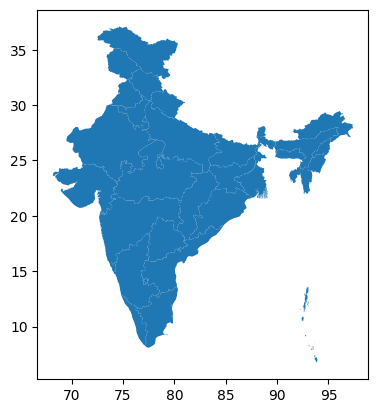

In [ ]:
#make the map
india.plot()

The above map plots the district and India map borders

# **Data Types and columns in the shapefile**

In [ ]:
india.dtypes


Name          object
Type          object
geometry    geometry
dtype: object

In [ ]:
india.columns

Index(['Name', 'Type', 'geometry'], dtype='object')

In [ ]:
india['Name'] = india['Name'].str.upper()
india.rename(columns= { 'Name':'STATE'}, inplace=True)

In [ ]:
india.describe

<bound method NDFrame.describe of                                        STATE             Type  \
0                                WEST BENGAL            State   
1                          ANDAMAN & NICOBAR  Union Territory   
2                                 CHANDIGARH  Union Territory   
3   DAMAN AND DIU AND DADRA AND NAGAR HAVELI  Union Territory   
4                                      DELHI  Union Territory   
5                                    HARYANA            State   
6                                  JHARKHAND            State   
7                                  KARNATAKA            State   
8                                     KERALA            State   
9                                LAKSHADWEEP  Union Territory   
10                            MADHYA PRADESH            State   
11                               MAHARASHTRA            State   
12                                PUDUCHERRY  Union Territory   
13                                 TAMILNADU            

In [ ]:
! wget -q -O India_district_Shapefile.zip https://github.com/HarshGujarathi7/GISTEST/raw/main/district.zip
zip_ref = zipfile.ZipFile('India_district_Shapefile.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
districts=gpd.read_file("output.shp") #load the shapefile with gpd as india

In [ ]:
districts.columns.values

array(['objectid', 'statecode', 'statename', 'state_ut', 'distcode',
       'distname', 'distarea', 'totalpopul', 'totalhh', 'totpopmale',
       'totpopfema', 'st_areasha', 'st_lengths', 'geometry'], dtype=object)

<Axes: >

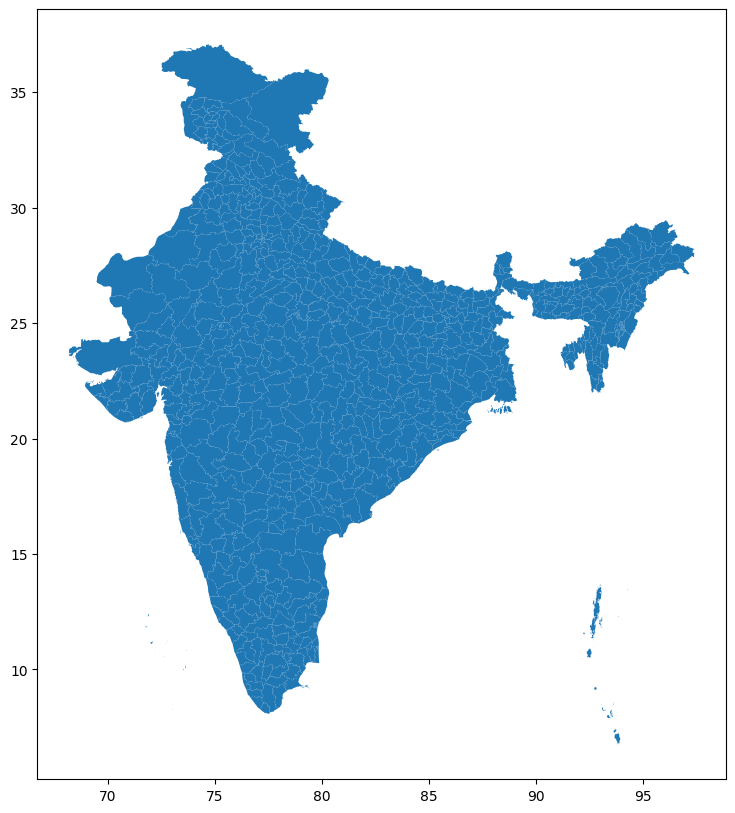

In [ ]:
districts.plot(figsize=(10,10))

In [ ]:
districts.isna().sum()

objectid       0
statecode      0
statename      0
state_ut       0
distcode       0
distname       0
distarea      64
totalpopul    33
totalhh       33
totpopmale    33
totpopfema    33
st_areasha     0
st_lengths     0
geometry       0
dtype: int64

## Blank values are quantitative so filling out the values using mean

In [ ]:
districts['distarea'].fillna(districts['distarea'].mean(),inplace=True)
districts['totalpopul'].fillna(districts['totalpopul'].mean(),inplace=True)
districts['totalhh'].fillna(districts['totalhh'].mean(),inplace=True)
districts['totpopmale'].fillna(districts['totpopmale'].mean(),inplace=True)
districts['totpopfema'].fillna(districts['totpopfema'].mean(),inplace=True)

In [ ]:
states = districts.dissolve(by='statename',aggfunc='sum').reset_index()
#states.head(1)


<ipython-input-16-fbefee931b23>:1: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  states = districts.dissolve(by='statename',aggfunc='sum').reset_index()


In [ ]:
States =states[["statename","totalpopul","geometry"]]
States['statename'] = States['statename'].str.upper()
States.rename(columns= { 'statename':'STATE'}, inplace=True)
States['population'] = States['totalpopul'] / 100

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-17-78a672c56440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  States.rename(columns= { 'statename':'STATE'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
States.columns

Index(['STATE', 'totalpopul', 'geometry', 'population'], dtype='object')

In [ ]:
#States.head(40)

##  Graph Description
The  Map below despicts the total population of each State in different colors.
Dark Grey color shows highest population followed by red , orange , yellow and light yellow .
West side of India in states like Maharashtra and North India -Uttar Pradesh ,Bihar has the highest population as per the graph

<Axes: >

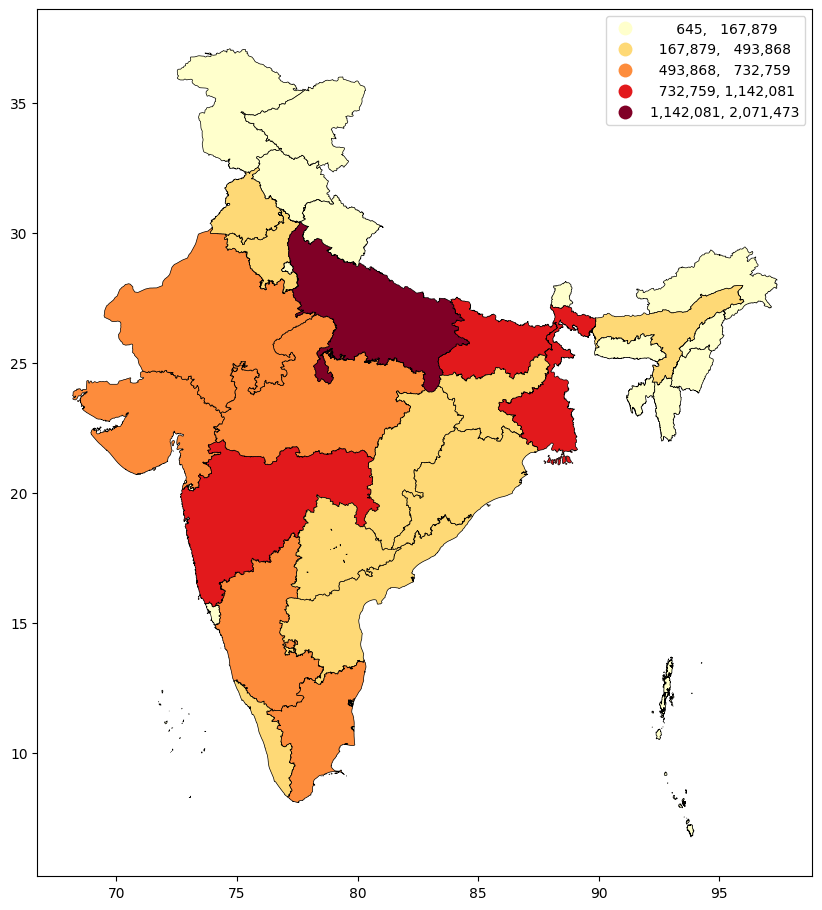

In [ ]:
States.plot(figsize=(10,12),column='population',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=.5,legend_kwds= {"fmt": "{:,.0f}"})

In [ ]:
states.describe()

,objectid,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths
count,37.000000,37.000000,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01,3.700000e+01
mean,6499.216216,90759.118850,3.434549e+07,7.077040e+06,1.767921e+07,1.666628e+07,1.068991e+11,9.456468e+06
std,8784.601212,97615.334170,4.367413e+07,8.391795e+06,2.268012e+07,2.100191e+07,1.128213e+11,9.047540e+06
min,75.000000,30.000000,6.447300e+04,1.157400e+04,3.312300e+04,3.135000e+04,1.548992e+08,8.160654e+04
25%,826.000000,16579.000000,1.383727e+06,3.024500e+05,7.139120e+05,6.698150e+05,1.235412e+10,3.078406e+06
50%,3463.000000,55673.000000,1.678794e+07,3.435999e+06,8.987326e+06,7.800615e+06,7.762950e+10,7.591459e+06
75%,8564.000000,150217.473768,4.938680e+07,1.266476e+07,2.473807e+07,2.464873e+07,1.565270e+11,1.356952e+07
max,45371.000000,342239.000000,2.071473e+08,3.495944e+07,1.082562e+08,9.889115e+07,4.299271e+11,3.381061e+07


In [ ]:
#merged = pd.merge(States, india, on='geometry',how='outer',indicator=True)
#merged['STATE'] = merged['STATE'].str.upper()
#merged.rename(columns= {'statename':'STATE'}, inplace=True)


In [ ]:
crime= pd.read_excel ('https://github.com/HarshGujarathi7/GISTEST/raw/main/District_wise_IPC_crime_reported_INDIA_2001-2012.xlsx')
crime.head(3)

,STATE,DISTRICT,THEFT,RIOTS,DACOITY,DOWRY DEATHS,RAPE,MURDER,KIDNAPPING AND ABDUCTION,ROBBERY,ASSAULT ON WOMEN,TOTAL CRIMES
0,ANDHRA PRADESH,ADILABAD,3964,1016,72,188,672,1186,754,237,1785,61959
1,ANDHRA PRADESH,ANANTAPUR,6079,1293,137,174,266,1922,839,244,2026,59927
2,ANDHRA PRADESH,CHITTOOR,11077,973,96,262,368,1270,907,207,1381,75471


In [ ]:
#crime1=crime.dissolve(by='STATE',aggfunc='sum').reset_index()
crime1 = crime.groupby('STATE')['TOTAL  CRIMES'].sum().reset_index()

In [ ]:
crime.isnull().sum()

STATE                       0
DISTRICT                    0
THEFT                       0
RIOTS                       0
DACOITY                     0
DOWRY DEATHS                0
RAPE                        0
MURDER                      0
KIDNAPPING AND ABDUCTION    0
ROBBERY                     0
ASSAULT ON WOMEN            0
TOTAL  CRIMES               0
dtype: int64

In [ ]:
crime1.loc[crime1['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
crime1.loc[crime1['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
crime1.loc[crime1['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
crime1.loc[crime1['STATE'] == 'DELHI UT', 'STATE'] = 'DELHI'
crime1.loc[crime1['STATE'] == 'A & N ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'

In [ ]:
filtered_df = crime1[crime1['STATE'].isin(['CHHATTISHGARH', 'ANDHRA PRADESH', 'KARNATAKA'])]
filtered_df1 = crime1[crime1['STATE'].isin(['JAMMU AND KASHMIR', 'HIMACHAL PRADESH'])]
# Calculate the mean 'TOTAL CRIMES' for the specified states
mean_total_crimes = filtered_df['TOTAL  CRIMES'].mean()
mean_total_crimes1 = filtered_df1['TOTAL  CRIMES'].mean()
print(mean_total_crimes1)
print(mean_total_crimes)

685740.0
1876811.6666666667


In [ ]:
new_row = {'STATE': 'DAMAN AND DIU AND DADRA AND NAGAR HAVELI', 'TOTAL  CRIMES': 287461}
crime1=crime1.append(new_row, ignore_index=True)
new_row1 = {'STATE': 'TELENGANA', 'TOTAL  CRIMES': 1876811.6}
crime1=crime1.append(new_row1, ignore_index=True)
new_row2 = {'STATE': 'LADAKH', 'TOTAL  CRIMES': 685740.0}
crime1=crime1.append(new_row2, ignore_index=True)

<ipython-input-28-2721ee00f817>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row, ignore_index=True)
<ipython-input-28-2721ee00f817>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row1, ignore_index=True)
<ipython-input-28-2721ee00f817>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  crime1=crime1.append(new_row2, ignore_index=True)


In [ ]:
crime1 = crime1[~crime1['STATE'].isin(['D & N HAVELI', 'DAMAN & DIU'])]

crime1.reset_index(drop=True, inplace=True)

In [ ]:
#crime1.rename(columns= {'STATE':'statename'}, inplace=True)

In [ ]:
crime1.head(40)

,STATE,TOTAL CRIMES
0,ANDAMAN & NICOBAR,161152.0
1,ANDHRA PRADESH,2233216.0
2,ARUNACHAL PRADESH,1833018.0
3,ASSAM,577157.0
4,BIHAR,1986383.0
5,CHANDIGARH,53853.0
6,CHHATTISHGARH,1756478.0
7,DELHI,926485.0
8,GOA,74209.0
9,GUJARAT,1966276.0


In [ ]:
different_states = set(india['STATE']) ^ set(crime1['STATE'])
print(different_states)

set()


In [ ]:
#merge
C1 = pd.merge(india, crime1, on='STATE',how='outer',indicator=True)
#C1[['distname','THEFT','totalpopul','state_ut','geometry','_merge']]
C2 = pd.merge(india, crime1, on='STATE',how='inner',indicator=False)

<Axes: >

[]

[]

Text(0.5, 131.9044079833447, 'source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012')

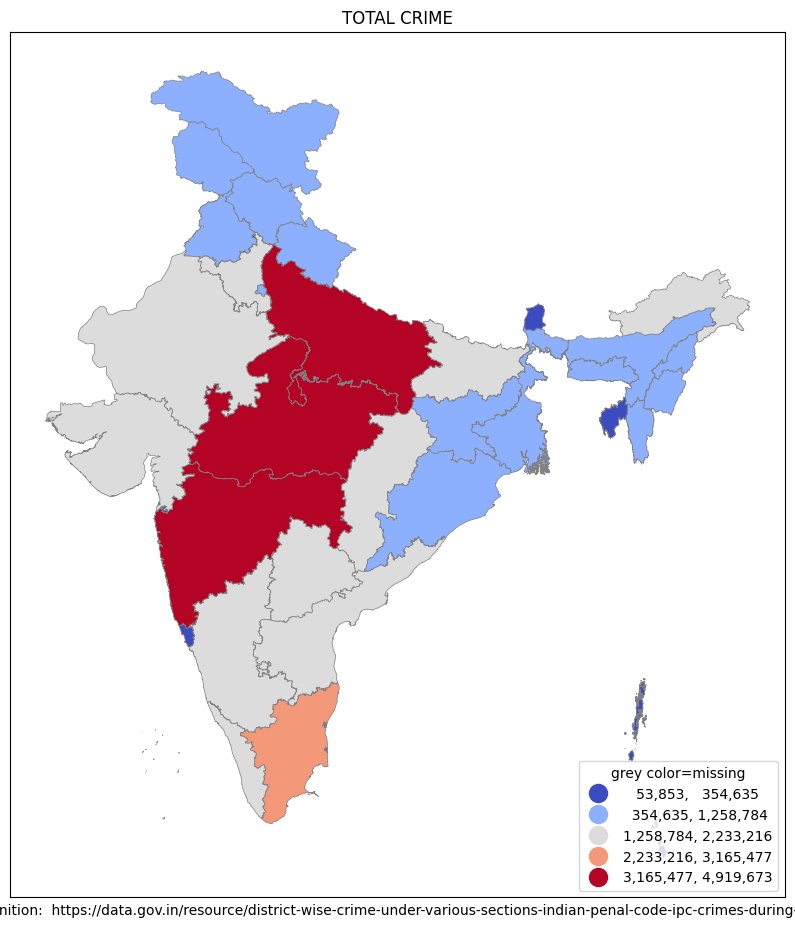

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
C1.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("TOTAL CRIME")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

## Above Map Description

The above graph shows the State wise THEFT Crimes in India .
As you can see from the map red color denotes highest crime while dark green depicts low amount of theft crime


*   Highest crime- UTTAR PRADESH - 53853.0
*   Least crime - CHANDIGARH- 4919673.0



## Finding the Max and least Theft Count



In [ ]:
min_theft_index = crime1['TOTAL  CRIMES'].idxmin()
max_theft_index = crime1['TOTAL  CRIMES'].idxmax()


State_with_min_theft = crime1.loc[min_theft_index, 'STATE']
min_theft_value = crime1.loc[min_theft_index, 'TOTAL  CRIMES']
State_with_max_theft = crime1.loc[max_theft_index, 'STATE']
max_theft_value = crime1.loc[max_theft_index, 'TOTAL  CRIMES']

print("State with minimum theft:", State_with_min_theft)
print("Minimum theft value:", min_theft_value)
print("State with Max theft:", State_with_max_theft)
print("Max theft value:", max_theft_value)

State with minimum theft: CHANDIGARH
Minimum theft value: 53853.0
State with Max theft: UTTAR PRADESH
Max theft value: 4919673.0


In [ ]:
States.loc[States['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
States.loc[States['STATE'] == 'CHHATISGARH', 'STATE'] = 'CHHATTISHGARH'
States.loc[States['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
States.loc[States['STATE'] == 'NCT OF DELHI', 'STATE'] = 'DELHI'
States.loc[States['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
States.loc[States['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
States.loc[States['STATE'] == 'PONDICHERRY', 'STATE'] = 'PUDUCHERRY'
States.loc[States['STATE'] == 'ORISSA', 'STATE'] = 'ODISHA'

In [ ]:
crime_pop = pd.merge(States, crime1, on='STATE',how='outer',indicator=True)

In [ ]:
crime_pop["crime_popu"] = (crime1["TOTAL  CRIMES"] /States["population"])

<Axes: >

[]

[]

Text(0.5, 131.26789372431656, 'source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012')

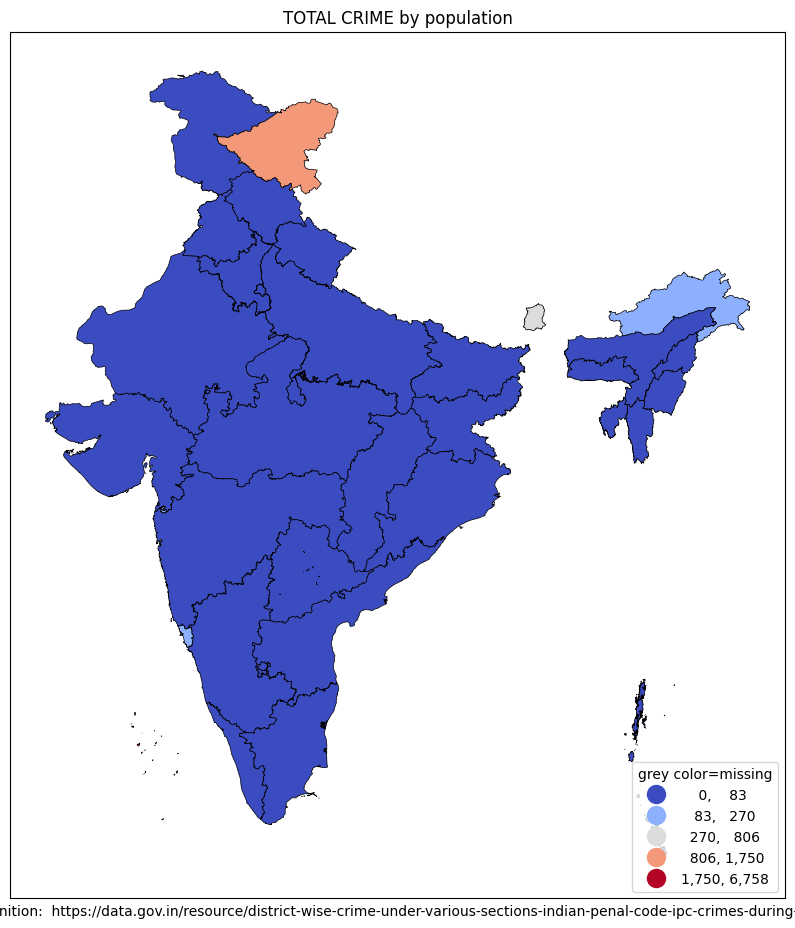

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
crime_pop.plot(ax=ax,column='crime_popu',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("TOTAL CRIME by population")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:  https://data.gov.in/resource/district-wise-crime-under-various-sections-indian-penal-code-ipc-crimes-during-2001-2012''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

## Map 2

In [ ]:
income= pd.read_excel ('https://github.com/HarshGujarathi7/files/raw/main/india_states_income.xlsx')
#income1 = income[["state", "Income"]]
income.rename(columns= {'state' : 'STATE'}, inplace=True)
income['STATE'] = income['STATE'].str.upper()
#income.rename(columns= {'Number of Households Pay Income Tax or Professional Tax' : 'income_pay'}, inplace=True)
#crime.rename(columns= {'STATE' : 'statename'}, inplace=True)
income.head(40)

,STATE,Income
0,ANDAMAN & NICOBAR ISLAND,1532470.000
1,ANDHRA PRADESH,1076033.000
2,ARUNACHAL PRADESH,1066310.000
3,ASSAM,623326.000
4,BIHAR,310196.000
5,CHANDIGARH,2524879.000
6,CHHATTISGARH,772529.000
7,DELHI,2747424.904
8,GOA,3173736.000
9,GUJARAT,1467046.000


In [ ]:
income1 = pd.read_excel ('https://github.com/HarshGujarathi7/files/raw/main/states_income.xlsx')
income1.rename(columns= {'state' : 'STATE'}, inplace=True)
income1['STATE'] = income1['STATE'].str.upper()
income1.loc[income1['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
income1.loc[income1['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
income1.loc[income1['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
income1.loc[income1['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
income1.loc[income1['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
income1.head(20)

,STATE,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,income,2021,2022,CATEGORY
0,ANDAMAN & NICOBAR ISLAND,2580.0,2302.0,2884.0,15192.0,16191.0,15354.0,15896.0,16350.0,14502.0,...,98735,106711,114660,129532,145562,154233.000,161564,NaN,NaN,Per Capita Income
1,ANDHRA PRADESH,2060.0,2134.0,2039.0,7416.0,7711.0,8071.0,8514.0,8191.0,9144.0,...,72254,79174,88609,94115,103177,108853.000,115344,114324.0,126587.0,Per Capita Income
2,ARUNACHAL PRADESH,2709.0,3013.0,3015.0,8733.0,8342.0,9352.0,8590.0,8634.0,8712.0,...,79004,91034,88768,91319,94008,99580.000,113110,108706.0,NaN,Per Capita Income
3,ASSAM,1544.0,1575.0,1557.0,5715.0,5737.0,5760.0,5793.0,5796.0,5664.0,...,43002,44809,50642,53575,57835,59943.000,61519,57227.0,NaN,Per Capita Income
4,BIHAR,1197.0,1105.0,1017.0,3037.0,3306.0,2728.0,3338.0,3100.0,3210.0,...,22776,23223,24064,25455,26719,29092.000,29794,28127.0,30779.0,Per Capita Income
5,CHANDIGARH,NaN,NaN,NaN,19761.0,21021.0,22524.0,24855.0,25470.0,26718.0,...,180615,182867,195205,208231,218201,227231.000,234350,203180.0,NaN,Per Capita Income
6,CHHATTISHGARH,NaN,NaN,NaN,6539.0,6445.0,6474.0,6654.0,6810.0,6873.0,...,61409,61122,61433,67139,68374,72537.000,75278,72236.0,NaN,Per Capita Income
7,DELHI,5447.0,6046.0,6042.0,18166.0,19575.0,19162.0,20983.0,23482.0,23762.0,...,200702,213669,233115,244255,252960,257596.904,260541,243110.0,263477.0,Per Capita Income
8,GOA,4883.0,4786.0,5381.0,16558.0,16977.0,17929.0,20686.0,20595.0,25364.0,...,188358,241081,278601,305875,308296,308753.000,313973,298527.0,NaN,Per Capita Income
9,GUJARAT,2641.0,2381.0,3091.0,9796.0,11535.0,11649.0,13206.0,13018.0,13735.0,...,102589,111370,120683,129738,143604,154887.000,164060,160321.0,NaN,Per Capita Income


In [ ]:
income.loc[income['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
income.loc[income['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
income.loc[income['STATE'] == 'TAMIL NADU', 'STATE'] = 'TAMILNADU'
income.loc[income['STATE'] == 'ANDAMAN & NICOBAR ISLANDS', 'STATE'] = 'ANDAMAN & NICOBAR'
income.loc[income['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
income.head(40)


,STATE,Income
0,ANDAMAN & NICOBAR ISLAND,1532470.000
1,ANDHRA PRADESH,1076033.000
2,ARUNACHAL PRADESH,1066310.000
3,ASSAM,623326.000
4,BIHAR,310196.000
5,CHANDIGARH,2524879.000
6,CHHATTISHGARH,772529.000
7,DELHI,2747424.904
8,GOA,3173736.000
9,GUJARAT,1467046.000


In [ ]:
different_states1 = set(States['STATE']) ^ set(income['STATE'])
print(different_states)

set()


In [ ]:
inc1 = pd.merge(States, income1, on='STATE',how='outer',indicator=True)
#print(C1.columns)
inc1[['STATE','income','_merge']]
inc2 = pd.merge(States, income1, on='STATE',how='inner',indicator=False)

,STATE,income,_merge
0,ANDAMAN & NICOBAR,NaN,left_only
1,ANDHRA PRADESH,115344.0,both
2,ARUNACHAL PRADESH,113110.0,both
3,ASSAM,61519.0,both
4,BIHAR,29794.0,both
5,CHANDIGARH,234350.0,both
6,CHHATTISHGARH,75278.0,both
7,DADRA & NAGAR HAVELI,NaN,left_only
8,DAMAN & DIU,NaN,left_only
9,GOA,313973.0,both


<Axes: >

[]

[]

Text(0.5, 148.1851714378084, 'source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.')

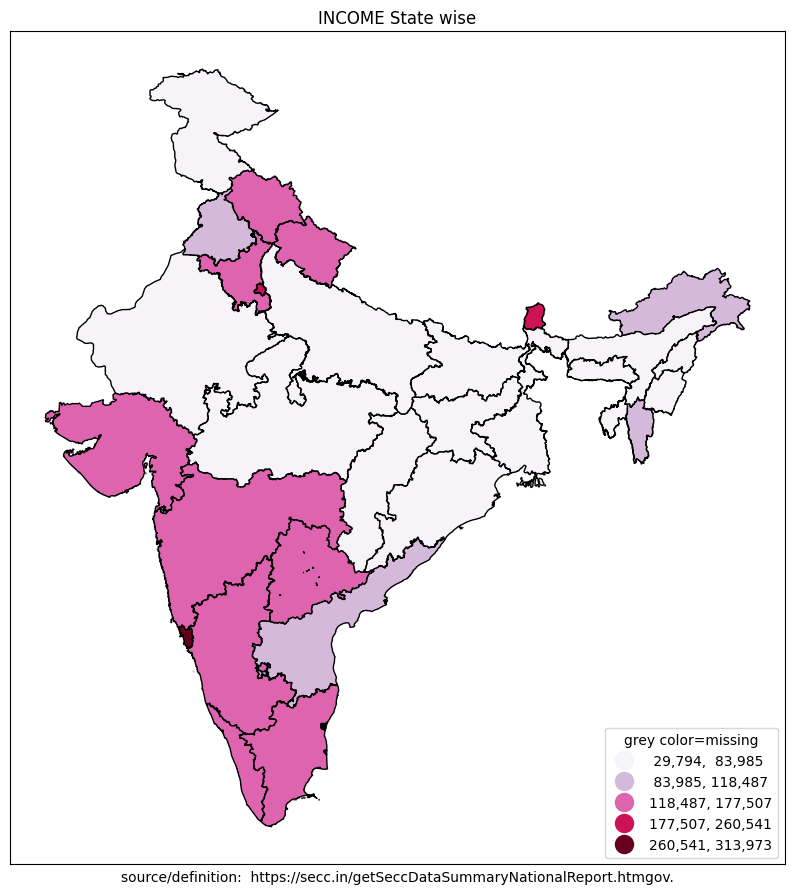

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
inc2.plot(ax=ax,column='income',legend=True,cmap='PuRd',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=1.0,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey color=missing''')
ax.title.set_text("INCOME State wise")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.''')

## Map 3 Regarding drug Consumption in India

In [ ]:
alcohol = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/Alcohol.xlsx')
alcohol.columns
alcohol.head(1)


Index(['Code', 'State State/UT', 'Alcohol Current', 'Alcohol Dependence (%)',
       'Alcohol 'Quantum of Work' (%)'],
      dtype='object')

,Code,State State/UT,Alcohol Current,Alcohol Dependence (%),Alcohol 'Quantum of Work' (%)
0,1,JAMMU & KASHMIR,3.5,0.3,1.2


In [ ]:
alcohol.rename(columns= {'State State/UT' : 'STATE'}, inplace=True)
alcohol['STATE'] = alcohol['STATE'].str.upper()
alcohol.rename(columns= {'Alcohol Current' : 'Usage'}, inplace=True)

In [ ]:
alcohol.loc[alcohol['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
alcohol.loc[alcohol['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
alcohol.loc[alcohol['STATE'] == 'TAMILINADO', 'STATE'] = 'TAMILNADU'
alcohol.loc[alcohol['STATE'] == 'ANDAMAN & NICOBAR ISLAND', 'STATE'] = 'ANDAMAN & NICOBAR'
alcohol.loc[alcohol['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
alcohol.loc[alcohol['STATE'] == 'UTTAR PRADESHI', 'STATE'] = 'UTTAR PRADESH'

In [ ]:
different_states2 = set(States['STATE']) ^ set(alcohol['STATE'])
print(different_states2)

{'LADAKH', nan, 'INDIA'}


In [ ]:
drug1 = pd.merge(States, alcohol, on='STATE',how='outer',indicator=True)
#print(C1.columns)
drug1[['STATE','Usage','_merge']]
drug2 = pd.merge(States, alcohol, on='STATE',how='inner',indicator=False)


,STATE,Usage,_merge
0,ANDAMAN & NICOBAR,25.4,both
1,ANDHRA PRADESH,13.7,both
2,ARUNACHAL PRADESH,28.0,both
3,ASSAM,8.8,both
4,BIHAR,0.9,both
...,...,...,...
149,NaN,NaN,right_only
150,NaN,NaN,right_only
151,NaN,NaN,right_only
152,NaN,NaN,right_only


<Axes: >

[]

[]

Text(0.5, 131.26789372431656, 'source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.')

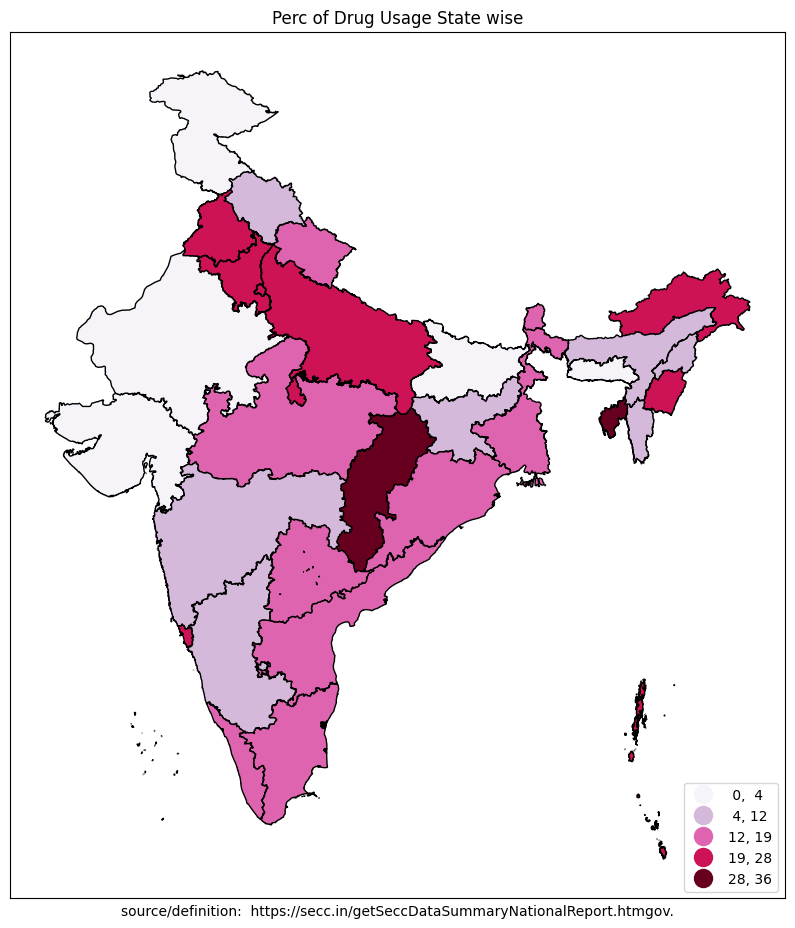

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
drug1.plot(ax=ax,column='Usage',legend=True,cmap='PuRd',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=1.0,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('')
ax.title.set_text("Perc of Drug Usage State wise")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.''')

## Centroid mapping of Crime ,Income and Drug Usage of each State of India

In [ ]:
#C1
C1c = C1.copy()
C1c["geometry"] = C1c["geometry"].centroid

<ipython-input-53-dc2d454c07fa>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  C1c["geometry"] = C1c["geometry"].centroid


In [ ]:
india_district_u=States.query("STATE=='UTTAR PRADESH'")
india_district_g=States.query("STATE=='GOA'")


<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Total Crime'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

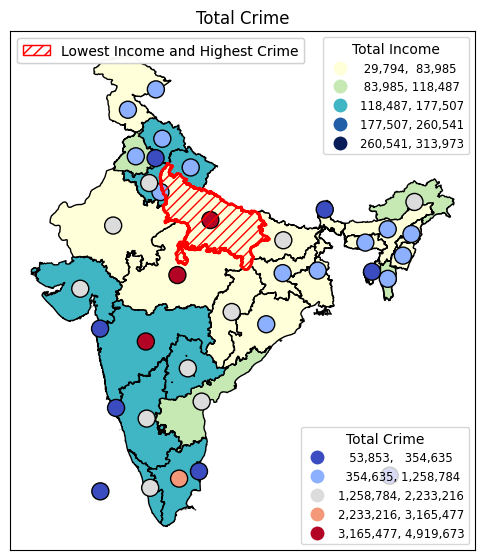

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,14))
inc2.plot(ax=ax,column='income',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
C1c.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Total Crime")

l2 = ax.get_legend()
l2.set_title('''Total Crime''')

india_district_u.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Total Crime''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Income and Highest Crime')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Total Crime'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

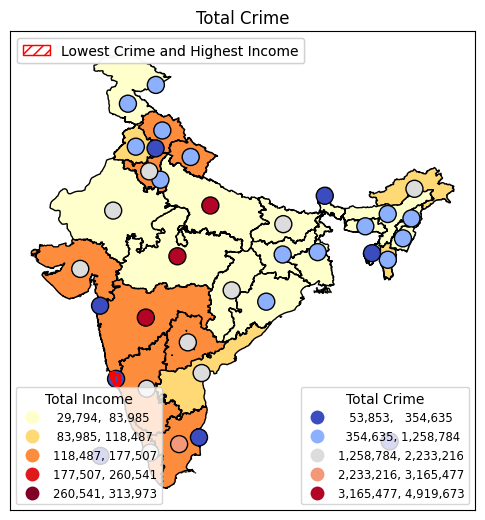

In [ ]:

fig, ax = plt.subplots(1, figsize=(6,14))
inc2.plot(ax=ax,column='income',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
C1c.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Total Crime")

l2 = ax.get_legend()
l2.set_title('''Total Crime''')

india_district_g.plot(ax=ax,edgecolor='red',linewidth=2, facecolor="none",alpha=1,hatch='///')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Total Crime''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='red', facecolor='none',
                     hatch='///', label=r'Lowest Crime and Highest Income')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

In [ ]:
D1c = drug1.copy()
D1c["geometry"] = D1c["geometry"].centroid

<ipython-input-89-e5985c0539cf>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  D1c["geometry"] = D1c["geometry"].centroid


In [ ]:
india_district_ct=States.query("STATE=='CHHATTISHGARH'|STATE=='TRIPURA'")

<Axes: >

[]

[]

<Axes: >

<Axes: title={'center': 'Drug Usage Perc'}>

'\n/   - diagonal hatching\n\\   - back diagonal\n|   - vertical\n-   - horizontal\n+   - crossed\nx   - crossed diagonal\no   - small circle\nO   - large circle\n.   - dots\n*   - stars\n'

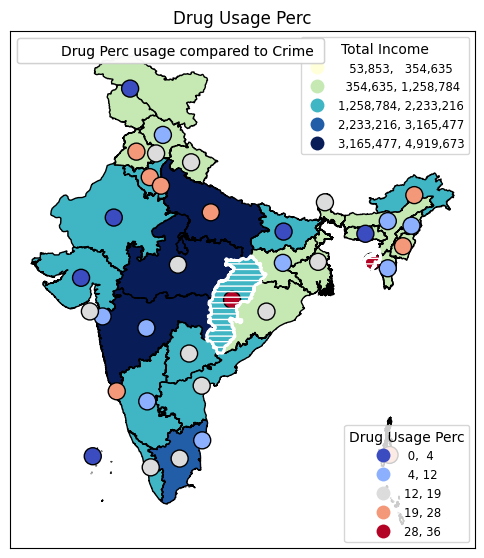

In [ ]:
fig, ax = plt.subplots(1, figsize=(6,14))
C1.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='YlGnBu',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'upper right','title_fontsize':'medium','fontsize':'small','markerscale':1})

l1 = ax.get_legend()
l1.set_title('''Total Income''')
ax.set_xticks([]); ax.set_yticks([])

ax.add_artist(l1)
D1c.plot(ax=ax,column='Usage',legend=True,cmap='coolwarm',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1},
         markersize = 150)


ax.title.set_text("Drug Usage Perc")

l2 = ax.get_legend()
l2.set_title('''Drug Usage Perc''')

india_district_ct.plot(ax=ax,edgecolor='white',linewidth=2, facecolor="none",alpha=1,hatch='---')
'''
/   - diagonal hatching
\   - back diagonal
|   - vertical
-   - horizontal
+   - crossed
x   - crossed diagonal
o   - small circle
O   - large circle
.   - dots
*   - stars
'''

l1 = ax.get_legend()
l1.set_title('''Drug Usage Perc''')

import matplotlib.patches as mpatches

bluePatch = mpatches.Patch(edgecolor='white', facecolor='none',
                     hatch='---', label=r'Drug Perc usage compared to Crime ')

l2=plt.legend(handles=[bluePatch],loc='upper left')


ax.add_artist(l2)
ax.add_artist(l1)

## HISTOGRAM OF OPIOIDS ABUSE PERC IN INDIA

In [ ]:
opioids = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/Opioids.xlsx')
opioids.columns

Index(['Code', 'State State/UT', 'Opioids Current Use (%)',
       'Opioids Dependence (%)', 'Opioids 'Quantum of Work' (%)'],
      dtype='object')

In [ ]:
opioids.rename(columns= {'State State/UT' : 'STATE'}, inplace=True)
opioids['STATE'] = opioids['STATE'].str.upper()
opioids.rename(columns= {'Opioids Current Use (%)' : 'opioid_usage_perc'}, inplace=True)

In [ ]:
opioids.loc[opioids['STATE'] == 'JAMMU & KASHMIR', 'STATE'] = 'JAMMU AND KASHMIR'
opioids.loc[opioids['STATE'] == 'CHHATTISGARH', 'STATE'] = 'CHHATTISHGARH'
opioids.loc[opioids['STATE'] == 'TAMILINADO', 'STATE'] = 'TAMILNADU'
opioids.loc[opioids['STATE'] == 'ANDAMAN & NICOBAR ISLAND', 'STATE'] = 'ANDAMAN & NICOBAR'
opioids.loc[opioids['STATE'] == 'TELANGANA', 'STATE'] = 'TELENGANA'
opioids.loc[opioids['STATE'] == 'UTTAR PRADESHI', 'STATE'] = 'UTTAR PRADESH'

In [ ]:
drugOP = pd.merge(States, opioids, on='STATE',how='inner',indicator=False)

(array([19.,  6.,  3.,  3.,  0.,  1.,  0.,  1.,  1.,  2.]),
 array([ 0.19 ,  2.738,  5.286,  7.834, 10.382, 12.93 , 15.478, 18.026,
        20.574, 23.122, 25.67 ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Opioids perc usage')

Text(0, 0.5, 'No of States')

Text(0.5, 1.0, 'Opioids Percentage Usage by State')

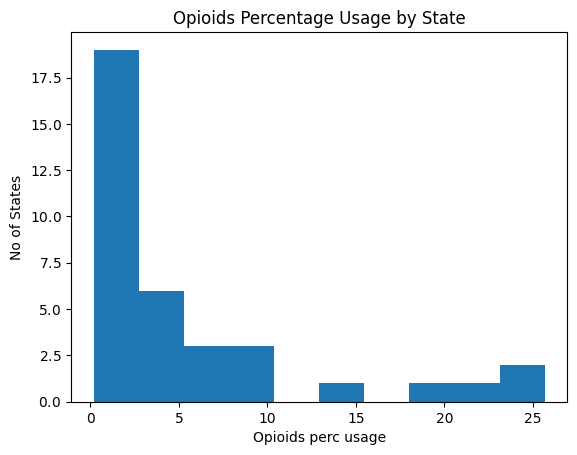

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

plt.hist(drugOP['opioid_usage_perc'], bins=10)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))

plt.xlabel('Opioids perc usage')
plt.ylabel('No of States')
plt.title('Opioids Percentage Usage by State')

plt.show()


## PIE CHART TO SHOW INCOME OF EACH STATE

In [ ]:
import matplotlib.pyplot as plt


In [ ]:

state_names = inc2['STATE'].tolist()
income_values = inc2['income'].tolist()


<Figure size 600x600 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7aec782f3d30>,
 [Text(-0.9040585464240566, 0.6266403630772774, 'ANDHRA PRADESH'),
  Text(-1.002666733525643, 0.45239299450921805, 'ARUNACHAL PRADESH'),
  Text(-1.0557760009852213, 0.30876696025263833, 'ASSAM'),
  Text(-1.0754497568447938, 0.23110132085835014, 'BIHAR'),
  Text(-1.0999995244026979, 0.0010228948325797136, 'CHANDIGARH'),
  Text(-1.0668576184468423, -0.2679828762475911, 'CHHATTISHGARH'),
  Text(-0.933933113629157, -0.5811789219052497, 'GOA'),
  Text(-0.6505123613108345, -0.8870364523410538, 'GUJARAT'),
  Text(-0.38776300967101196, -1.0293880941272242, 'HARYANA'),
  Text(-0.11736865303619815, -1.0937205307044706, 'HIMACHAL PRADESH'),
  Text(0.06535154775738751, -1.0980569999802898, 'JAMMU AND KASHMIR'),
  Text(0.17358319990778304, -1.086217691215612, 'JHARKHAND'),
  Text(0.35355887874386993, -1.0416314699841676, 'KARNATAKA'),
  Text(0.5945153899316138, -0.9255006489108808, 'KERALA'),
  Text(0.7411572363643774, -0.8128259044744567, 'MADHYA PRA

(-1.0999999999952987,
 1.099999999902164,
 -1.0999999999875667,
 1.0999999997625676)

Text(0.5, 1.0, 'Income Distribution by State in India')

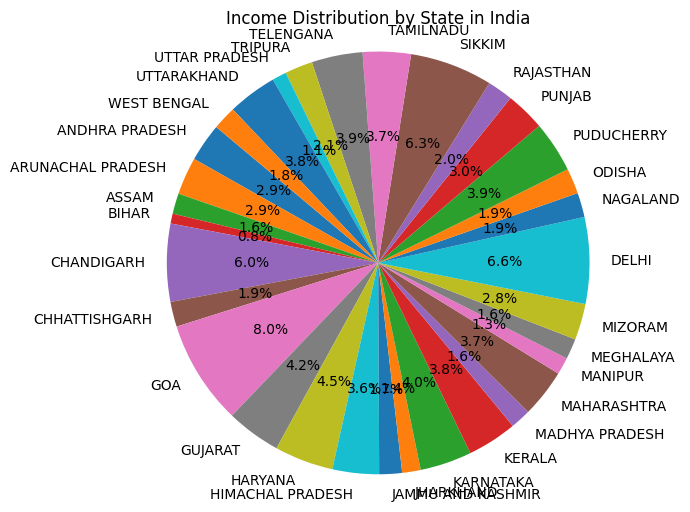

In [ ]:
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(income_values, labels=state_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Income Distribution by State in India')

# You can further customize the appearance, colors, and other properties of the pie chart.


## BASEMAP

In [ ]:
! pip install contextily
import contextily as cx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 45.8 MB/s eta 0:00:00


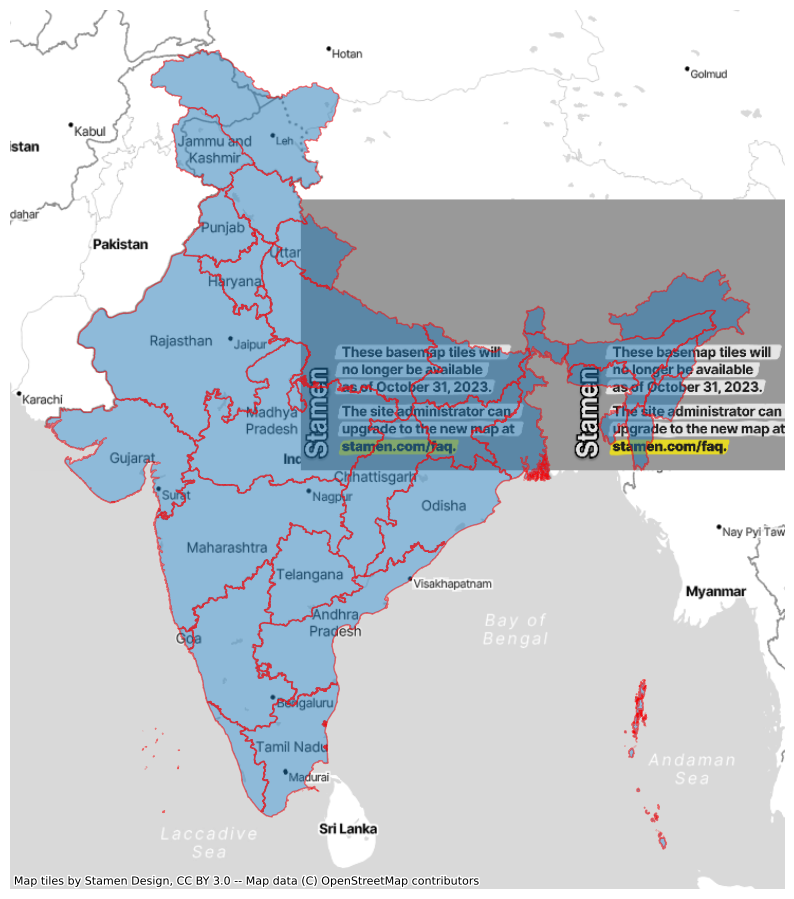

In [ ]:
india = india.to_crs(epsg=3857)
ax = india.plot(figsize=(10, 20), alpha=0.5, edgecolor="red")
#cx.add_basemap(ax)
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)
#cx.add_basemap(ax, source=cx.providers.Stamen.Watercolor)
ax.set_axis_off()

## Location of Police Stations in INDIA

In [ ]:
! wget -q -O police.zip https://github.com/HarshGujarathi7/files/raw/main/police_stations.zip
zip_ref = zipfile.ZipFile('police.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
!ls -lah
police =gpd.read_file("police_india.shp")

total 67M
drwxr-xr-x 1 root root 4.0K Oct 12 19:03 .
drwxr-xr-x 1 root root 4.0K Oct 12 19:00 ..
drwxr-xr-x 4 root root 4.0K Oct 11 13:22 .config
-rw-r--r-- 1 root root  23M Oct 12 19:01 India_district_Shapefile.zip
drwxr-xr-x 2 root root 4.0K Oct 12 19:01 India_State_Shapefile
-rw-r--r-- 1 root root  14M Oct 12 19:01 India_State_Shapefile.zip
-rw-r--r-- 1 root root    5 Oct 12 19:01 output.cpg
-rw-r--r-- 1 root root 109K Oct 12 19:01 output.dbf
-rw-r--r-- 1 root root  143 Oct 12 19:01 output.prj
-rw-r--r-- 1 root root  31M Oct 12 19:01 output.shp
-rw-r--r-- 1 root root 5.6K Oct 12 19:01 output.shx
-rw-r--r-- 1 root root 101K Oct 12 19:03 police_india.dbf
-rw-r--r-- 1 root root  143 Oct 12 19:03 police_india.prj
-rw-r--r-- 1 root root  35K Oct 12 19:03 police_india.shp
-rw-r--r-- 1 root root  11K Oct 12 19:03 police_india.shx
-rw-r--r-- 1 root root  34K Oct 12 19:03 police.zip
drwxr-xr-x 1 root root 4.0K Oct 11 13:23 sample_data


<Axes: >

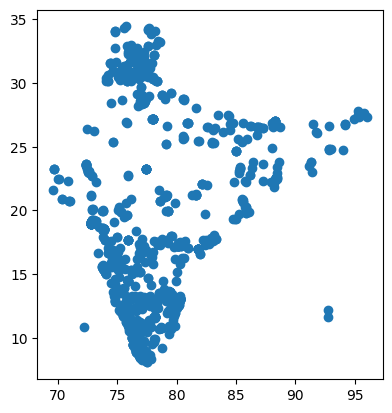

In [ ]:
police.plot()

## Relationship between Crime and Police stations

<Axes: >

<Axes: >

<ipython-input-69-c3d8259bdb3c>:16: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend1.legendHandles[0]._sizes = [100]


<Axes: >

Text(0.5, 1.0, 'Total Crime')

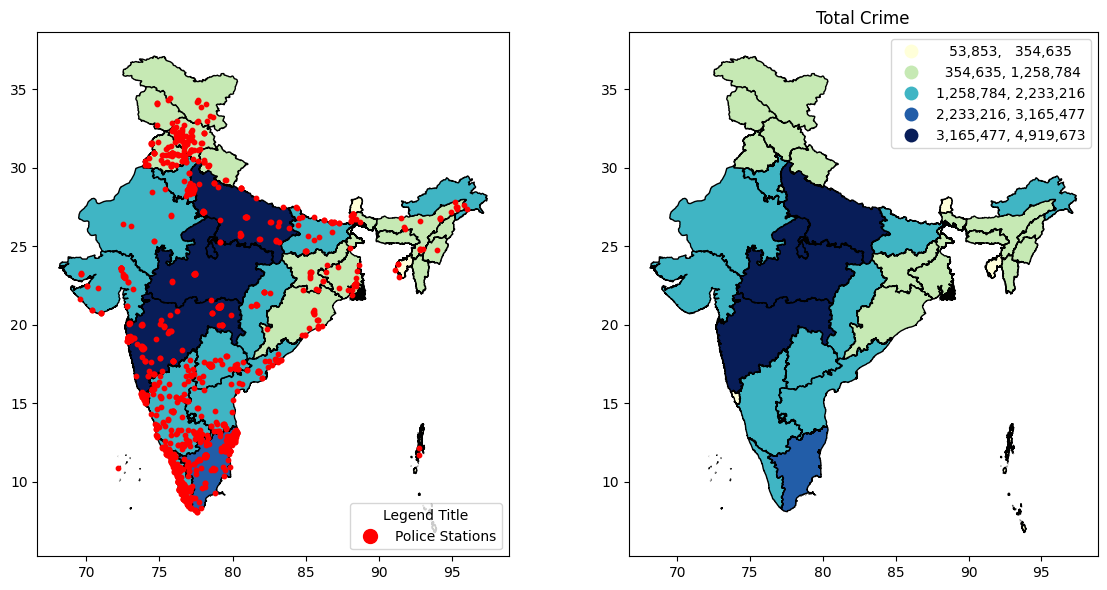

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first map (map1) in the first subplot
C1.plot(ax=ax[0], column='TOTAL  CRIMES', cmap='YlGnBu',scheme='natural_breaks', k=5, edgecolor='black', linewidth=1, legend=False)
police.plot(ax=ax[0], marker='o', color='red', markersize=10)

# Add a custom legend for the first map (map1)
point = Line2D([0], [0], label='Police Stations', marker='o', markersize=10, markeredgecolor='red', markerfacecolor='red', linestyle='')
legend1 = ax[0].legend(handles=[point], loc='lower right', title='Legend Title')

# Set the markerscale for the legend markers
legend1.legendHandles[0]._sizes = [100]

# Set the fontsize for the legend title
legend1.get_title().set_fontsize('medium')

# Plot the second map (map2) in the second subplot
C1.plot(ax=ax[1], column='TOTAL  CRIMES', cmap='YlGnBu', scheme='natural_breaks', k=5, edgecolor='black', linewidth=1, legend=True, legend_kwds={"fmt": "{:,.0f}"}, markersize=150)

# Set a title for the second map (map2)
ax[1].set_title("Total Crime")

# Show the plot
plt.tight_layout()
plt.show()


## Goa and UP District and Sub District

In [ ]:
! wget -q -O Goa.zip https://github.com/HarshGujarathi7/files/raw/main/nyu_2451_42190.zip
zip_ref = zipfile.ZipFile('Goa.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
goa=gpd.read_file("nyu_2451_42190/india-village-census-2001-GA.shp")





In [ ]:
districtup = districts[districts['statename'] == 'Uttar Pradesh']
districtup.describe()
districtup.rename(columns= {'statename' : 'STATE'}, inplace=True)
districtup['STATE'] = districtup['STATE'].str.upper()
districtup.rename(columns= {'distname' : 'DISTRICT'}, inplace=True)
districtup['DISTRICT'] = districtup['DISTRICT'].str.upper()

,objectid,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths
count,75.000000,75.000000,7.500000e+01,75.000000,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01
mean,604.946667,3470.811998,2.761964e+06,466125.834020,1.443415e+06,1.318549e+06,4.062770e+09,4.373131e+05
std,23.296499,1373.458631,1.166069e+06,195753.468988,6.076177e+05,5.606532e+05,1.692628e+09,1.380117e+05
min,564.000000,1015.000000,8.759580e+05,158435.000000,4.663580e+05,4.096000e+05,1.239416e+09,2.291357e+05
25%,586.500000,2387.000000,1.816576e+06,314272.500000,9.439114e+05,8.603395e+05,3.025727e+09,3.434778e+05
50%,605.000000,3349.000000,2.498156e+06,414266.000000,1.312302e+06,1.209192e+06,3.706448e+09,4.189888e+05
75%,623.500000,4422.000000,3.647078e+06,607562.500000,1.884830e+06,1.734191e+06,5.107024e+09,5.185968e+05
max,656.000000,7680.000000,5.954391e+06,976733.000000,3.131807e+06,2.822584e+06,9.934774e+09,1.039938e+06


<ipython-input-71-9b992ad58e82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  districtup.rename(columns= {'statename' : 'STATE'}, inplace=True)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-71-9b992ad58e82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dist

In [ ]:
districtup.columns

Index(['objectid', 'statecode', 'STATE', 'state_ut', 'distcode', 'DISTRICT',
       'distarea', 'totalpopul', 'totalhh', 'totpopmale', 'totpopfema',
       'st_areasha', 'st_lengths', 'geometry'],
      dtype='object')

<Axes: >

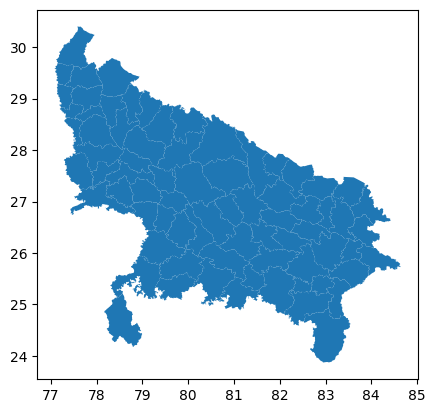

In [ ]:
districtup.plot()

In [ ]:
upcrime = pd.read_excel('https://github.com/HarshGujarathi7/files/raw/main/District_wise_IPC_crime_reported_INDIA_2001-2012.xlsx')
upcrime.columns

Index(['STATE', 'DISTRICT', 'THEFT', 'RIOTS', 'DACOITY', 'DOWRY DEATHS',
       'RAPE', 'MURDER', 'KIDNAPPING AND ABDUCTION', 'ROBBERY',
       'ASSAULT ON WOMEN', 'TOTAL  CRIMES'],
      dtype='object')

In [ ]:
districtsupcrime = upcrime[upcrime['STATE'] == 'UTTAR PRADESH']
districtsupcrime.head(10)

,STATE,DISTRICT,THEFT,RIOTS,DACOITY,DOWRY DEATHS,RAPE,MURDER,KIDNAPPING AND ABDUCTION,ROBBERY,ASSAULT ON WOMEN,TOTAL CRIMES
579,UTTAR PRADESH,AGRA,7027,1281,82,184,407,716,811,529,693,53702
580,UTTAR PRADESH,ALIGARH,27823,1971,115,579,1825,2178,3552,1318,2864,212419
581,UTTAR PRADESH,ALLAHABAD,5604,1394,45,179,302,765,569,266,649,57058
582,UTTAR PRADESH,AMBEDKAR NAGAR,2768,645,27,84,270,402,401,122,395,34512
583,UTTAR PRADESH,AURAIYA,20693,4120,120,307,775,2022,1325,674,2534,189446
584,UTTAR PRADESH,AZAMGARH,20419,4062,108,319,754,2046,1312,776,2197,199994
585,UTTAR PRADESH,BADAUN,3399,581,68,175,288,795,481,256,409,38628
586,UTTAR PRADESH,BAGHPAT,2625,663,39,92,313,623,378,218,466,35468
587,UTTAR PRADESH,BAHRAICH,4620,499,38,102,260,576,435,319,414,40007
588,UTTAR PRADESH,BALLIA,19303,3424,148,324,958,2165,1629,757,2250,197763


In [ ]:
different_districts = set(districtup['DISTRICT']) ^ set(districtsupcrime['DISTRICT'])
print(different_districts)

{'CHANDAULI', 'SIDHARTHNAGAR', 'GAUTAM BUDDHA NAGAR', 'G.R.P.', 'FATEHGARH', 'MAHRAJGANJ', 'KUSHI NAGAR', 'BARABANKI', 'AMETHI', 'TOTAL', 'RAIBAREILLY', 'GAUTAMBUDH NAGAR', 'J.P.NAGAR', 'ST.RAVIDASNAGAR', 'MAHARAJGANJ', 'BADAUN', 'BULANDSHAHR', 'RAE BARELI', 'SIDDHARTHNAGAR', 'SANT KABIR NAGAR', 'CHITRAKOOT DHAM', 'CHANDOLI', 'SAMLI', 'FARRUKHABAD', 'KUSHINAGAR', 'MAHAMAYA NAGAR', 'SANT KABIRNAGAR', 'CHITRAKOOT', 'SAMBHAL', 'BULANDSHAHAR', 'KHERI', 'BARA BANKI', 'JYOTIBA PHULE NAGAR', 'KHIRI', 'BUDAUN', 'HATHRAS', 'SANT RAVIDAS NAGAR (BHADOHI)', 'KANSHIRAM NAGAR', 'HAPUR'}


In [ ]:
district_set_up = set(districtup['DISTRICT'])
district_set_supcrime = set(districtsupcrime['DISTRICT'])

# Find the missing districts in each DataFrame
missing_in_districtup = district_set_supcrime - district_set_up
missing_in_districtsupcrime = district_set_up - district_set_supcrime

print("Districts missing in districtup DataFrame:")
print(missing_in_districtup)

print("\nDistricts missing in districtsupcrime DataFrame:")
print(missing_in_districtsupcrime)



Districts missing in districtup DataFrame:
{'BULANDSHAHAR', 'RAIBAREILLY', 'SANT KABIRNAGAR', 'BADAUN', 'KUSHI NAGAR', 'GAUTAMBUDH NAGAR', 'J.P.NAGAR', 'BARABANKI', 'ST.RAVIDASNAGAR', 'KHIRI', 'G.R.P.', 'CHITRAKOOT DHAM', 'CHANDOLI', 'TOTAL', 'HATHRAS', 'SIDHARTHNAGAR', 'MAHARAJGANJ', 'FATEHGARH'}

Districts missing in districtsupcrime DataFrame:
{'CHANDAULI', 'RAE BARELI', 'SIDDHARTHNAGAR', 'SANT KABIR NAGAR', 'SAMLI', 'FARRUKHABAD', 'KUSHINAGAR', 'MAHAMAYA NAGAR', 'GAUTAM BUDDHA NAGAR', 'CHITRAKOOT', 'SAMBHAL', 'KHERI', 'BARA BANKI', 'MAHRAJGANJ', 'JYOTIBA PHULE NAGAR', 'AMETHI', 'BUDAUN', 'SANT RAVIDAS NAGAR (BHADOHI)', 'KANSHIRAM NAGAR', 'HAPUR', 'BULANDSHAHR'}


In [ ]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

# Create a dictionary to map similar district names to a common name
district_name_mapping = {}

# Loop through district names in districtup
for district1 in districtup['DISTRICT']:
    # Loop through district names in districtsupcrime
    for district2 in districtsupcrime['DISTRICT']:
        # Calculate a similarity score between the two district names
        similarity_score = fuzz.ratio(district1, district2)
        # You can adjust the threshold to control the similarity level required
        if similarity_score >= 90:
            # Use the lowercased version of the district names as keys to handle case variations
            district_name_mapping[district1.lower()] = district2

# Update the district names in districtup DataFrame
districtup['DISTRICT'] = districtup['DISTRICT'].apply(lambda x: district_name_mapping.get(x.upper(), x))

# Update the district names in districtsupcrime DataFrame
districtsupcrime.loc[:, 'DISTRICT'] = districtsupcrime['DISTRICT'].apply(lambda x: district_name_mapping.get(x.upper(), x))




/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-79-2b03ff2d1db0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distr

In [ ]:
crimeUP1 = pd.merge(districtup, districtsupcrime, on='DISTRICT',how='outer',indicator=True)
#print(C1.columns)
crimeUP1[['DISTRICT','TOTAL  CRIMES','_merge']]
crimeUP2 = pd.merge(districtup, districtsupcrime, on='DISTRICT',how='inner',indicator=False)

,DISTRICT,TOTAL CRIMES,_merge
0,AMBEDKAR NAGAR,34512.0,both
1,BALLIA,197763.0,both
2,KANPUR NAGAR,34258.0,both
3,SANT RAVIDAS NAGAR (BHADOHI),NaN,left_only
4,SIDDHARTHNAGAR,NaN,left_only
...,...,...,...
88,RAIBAREILLY,22945.0,right_only
89,SANT KABIRNAGAR,27873.0,right_only
90,SIDHARTHNAGAR,30873.0,right_only
91,ST.RAVIDASNAGAR,19641.0,right_only


<Axes: >

[]

[]

Text(0.5, 186.53447013850024, 'source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.')

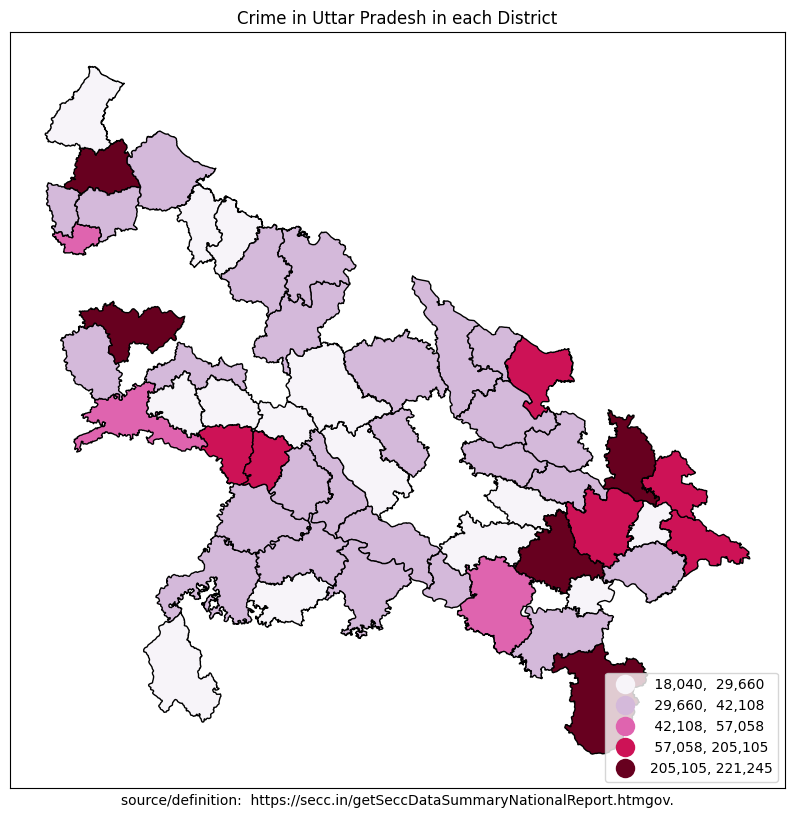

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,12))
crimeUP2.plot(ax=ax,column='TOTAL  CRIMES',legend=True,cmap='PuRd',
          scheme='natural_breaks',k=5, edgecolor='black',linewidth=1.0,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('')
ax.title.set_text("Crime in Uttar Pradesh in each District")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''source/definition:  https://secc.in/getSeccDataSummaryNationalReport.htmgov.''')

In [ ]:
goa.columns.values
goa.head(1)

array(['SID', 'DID', 'TID', 'VILL_CODE', 'C_CODE01', 'NAME', 'UID',
       'CENSUS_COD', 'STATE', 'DISTRICT', 'SUB_DIST', 'TOWN_VILL', 'WARD',
       'EB', 'LEVEL', 'NAME_1', 'TRU', 'No_HH', 'TOT_P', 'TOT_M', 'TOT_F',
       'P_06', 'M_06', 'F_06', 'P_SC', 'M_SC', 'F_SC', 'P_ST', 'M_ST',
       'F_ST', 'P_LIT', 'M_LIT', 'F_LIT', 'P_ILL', 'M_ILL', 'F_ILL',
       'TOT_WORK_P', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_P',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_P', 'MAIN_CL_M', 'MAIN_CL_F',
       'MAIN_AL_P', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_P', 'MAIN_HH_M',
       'MAIN_HH_F', 'MAIN_OT_P', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_P',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_P', 'MARG_CL_M', 'MARG_CL_F',
       'MARG_AL_P', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_P', 'MARG_HH_M',
       'MARG_HH_F', 'MARG_OT_P', 'MARG_OT_M', 'MARG_OT_F', 'NON_WORK_P',
       'NON_WORK_M', 'NON_WORK_F', 'ST_CODE', 'DIST_CODE', 'THSIL_CODE',
       'BLOCK_CODE', 'V_CT_CODE', 'VILL_NAME', 'AREA', 'T_HH', 'T_P'

,SID,DID,TID,VILL_CODE,C_CODE01,NAME,UID,CENSUS_COD,STATE,DISTRICT,...,TANK_IRR,RIVER_IRR,LAKE_IRR,W_FALL,OTH_IRR,TOT_IRR,UN_IRR,CULT_WASTE,AREA_NA_CU,geometry
0,30,01,0001,00001300,3001000100001300,Torxem,607635,3.001000e+15,30,1,...,0,13.0,0.0,0,11.0,26.5,546.95,135.34,241.55,"POLYGON ((-265707.490 1759491.666, -265712.811..."


In [ ]:
goa1 = gpd.read_file("nyu_2451_42190/india-village-census-2001-GA.shp")
goa1=goa1[['DISTRICT','VILL_NAME']]
goa1.head(1000)

,DISTRICT,VILL_NAME
0,1,Torxem
1,1,Mopa
2,1,Tamboxem
3,1,Uguem
4,1,Chandel
...,...,...
400,2,Poinguinim
401,2,Loliem
402,0,NaN
403,0,NaN


<Axes: >

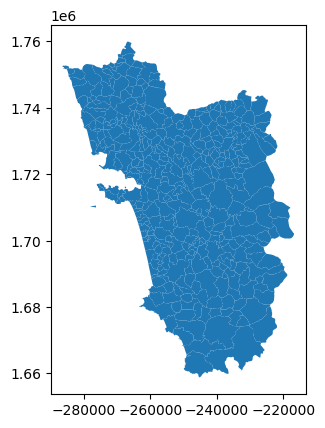

In [ ]:
goa.plot()